In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.distributions.multivariate_normal import MultivariateNormal
from torch.distributions.normal import Normal
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import torch.optim as optim
from torch.autograd import Variable
import numpy.random as rand
import numpy as np
import sys
import os
os.getcwd()

'/content'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# Real dataset
#Emerson's Paths:
small_trained_path = "/content/drive/My Drive/Tufts/Tufts 19-20/Final Project: Get Churn't/data/smallTrainCleaned.csv"
y_label_path = "/content/drive/My Drive/Tufts/Tufts 19-20/Final Project: Get Churn't/data/y_labels.csv"
#small_trained_path = "/content/drive/My Drive/Tufts/Tufts '19-20/Fall 2019/Comp150-03 - Bayesian Deep Learning/Final Project: Get Churn't/data/smallTrainCleaned.csv"
#y_label_path = "/content/drive/My Drive/Tufts/Tufts '19-20/Fall 2019/Comp150-03 - Bayesian Deep Learning/Final Project: Get Churn't/data/y_labels.csv"
data = pd.read_csv(small_trained_path)
Y = pd.read_csv(y_label_path)

data['Y'] = Y
data['Y'][data['Y'] == -1] = 0
data = data.sample(frac=1).reset_index(drop=True)

print(Y)

FileNotFoundError: ignored

In [0]:
batch_size = 100
n_iters = 3000

num_epochs = int(n_iters / (data.shape[0] / batch_size))

train_size = int(0.8 * len(data))
test_size = len(data) - train_size

train_dataset = data[:train_size]
test_dataset = data[train_size:]


train_y = train_dataset['Y']
train_dataset = train_dataset.drop('Y', axis=1)

test_y = test_dataset['Y']
test_dataset = test_dataset.drop('Y', axis=1)


train_loader = torch.utils.data.DataLoader(
                  torch.utils.data.TensorDataset(
                      torch.tensor(train_dataset.values),
                      torch.tensor(train_y.values)),
                  batch_size=batch_size,
                  shuffle=True)



test_loader = torch.utils.data.DataLoader(
                  torch.utils.data.TensorDataset(
                      torch.tensor(test_dataset.values),
                      torch.tensor(test_y.values)),
                  batch_size=batch_size,
                  shuffle=True)

NameError: ignored

In [0]:
# Toy dataset
X_path = "/content/drive/My Drive/Tufts/Tufts 19-20/Final Project: Get Churn't/data/toy_x.csv"
y_path = "/content/drive/My Drive/Tufts/Tufts 19-20/Final Project: Get Churn't/data/toy_y.csv"

X = np.loadtxt(X_path, delimiter=',', dtype=np.float64)[:1000]
y = np.loadtxt(y_path, delimiter=',', dtype=np.float64)[:1000]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2)


OSError: ignored

In [0]:
W = np.array([-10, 10]).reshape(-1, 1)
b = -5
X_train = np.random.uniform(-10,10, (5000, 2))
X_train[:,0] = 0.0
X_train.shape
W.T.shape

eps = 0.0001
W_s = np.array([0.0, 0.3]).reshape(-1, 1)
print(W_s)
b_s = 0.1

print(b_s)

y_train = np.zeros((X_train.shape[0], 1), dtype=float)
for ind, x in enumerate(X_train):
  # y_train[ind] = x @ W + b + np.random.normal(loc=0, scale=np.exp(x @ W_s + b_s))
  y_train[ind] = x.reshape(1,-1) @ W + b + np.random.normal(loc=0, scale=np.exp(x @ W_s + b_s))



print(y_train)


[[0. ]
 [0.3]]
0.1
[[ 71.78838351]
 [  7.19896662]
 [-43.82985459]
 ...
 [ 64.74341789]
 [ 86.64912349]
 [-79.17035733]]


(array([6723., 6785., 6773., 6875., 6880., 7314., 6079., 2212.,  338.,
          21.]),
 array([-105.06562614,  -77.91382127,  -50.76201639,  -23.61021152,
           3.54159336,   30.69339823,   57.84520311,   84.99700798,
         112.14881286,  139.30061773,  166.45242261]),
 <a list of 10 Patch objects>)

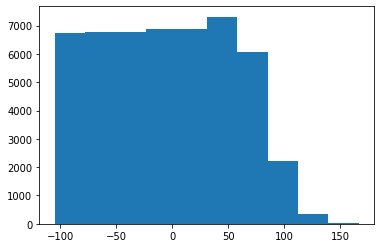

In [0]:
plt.hist(y_train)
# np.exp(10 * 0.01)

In [0]:
# print(X_train.shape)
# plt.scatter(X_train[:,0], X_train[:,1], y_train)
tst = np.empty_like(X_train[:,0])
for ind, x in enumerate(X_train):
  # y_train[ind] = x @ W + b + np.random.normal(loc=0, scale=np.exp(x @ W_s + b_s))
  tst[ind] = x.reshape(1,-1) @ W + b + np.random.normal(loc=0, scale=np.exp(x @ W_s + b_s))
tst

print(gauss_logpdf(tst, X_train @ W + b, np.exp(x @ W_s + b_s)).sum())
print(gauss_logpdf(tst, X_train @ W + b, np.exp(x @ W_s + b_s) + 100).sum())


-33145520362.758266
-31103853.933023214


[[ 71.78838351]
 [  7.19896662]
 [-43.82985459]
 ...
 [ 64.74341789]
 [ 86.64912349]
 [-79.17035733]]
[[ 0.          8.12428378]
 [ 0.          1.24187669]
 [ 0.         -3.8538643 ]
 ...
 [ 0.          6.71687289]
 [ 0.          8.68972045]
 [ 0.         -7.4270165 ]]


Text(0.5, 0, 'output[:,1] (Standard Deviation)')

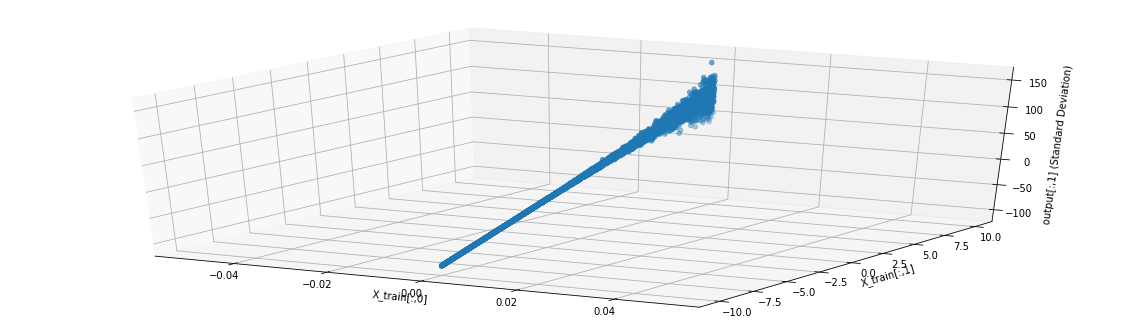

In [0]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

print(y_train)
print(X_train)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(311, projection='3d')

sparse_cap = int(len(X_train) / 10)

ax.scatter(X_train[:,0], X_train[:,1], y_train)
ax.set_xlabel('X_train[:,0]')
ax.set_ylabel('X_train[:,1]')
ax.set_zlabel('output[:,1] (Standard Deviation)')


In [0]:
'''
STEP 1: LOADING DATASET   
'''


'\nSTEP 1: LOADING DATASET   \n'

In [0]:
'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)


NameError: ignored

In [0]:
X_train.shape

(5000, 2)

In [0]:
'''
STEP 2.5: MODEL HELPER FUNCTIONS
'''

def gauss_logpdf(x, mu, s):
    normalized_x = (x - mu) / s
    # if isinstance(x, torch.Tensor):
    logprob = (-1 * (normalized_x ** 2) / 2) - 0.5 * np.log(2 * np.pi)
    # if isinstance(x, numpy.ndarray):
    #     logprob = (-1 * (normalized_x ** 2) / 2) - 0.5 * np.log(2 * np.pi)
    return logprob
  


# probably want to change name of this to sigmoid_torch
def sigmoid(x):
    return (1/(1+torch.exp(-1*x)))

def sigmoid_np(x):
    return (1/(1+np.exp(-1*x)))


In [0]:
# - Rewrite predict functions
# - Review likelihood
#

              # for all layers before output layer should look like:
              # output = self.l1_relu(self.l1(X, predict))


In [0]:
'''
STEP 3: CREATE MODEL CLASS
'''

class BNNLayer(nn.Module):
    def __init__(self, input_dim=30, output_dim=2, prior_mu=0, prior_s=0.01, preset=False):
        super(BNNLayer, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.prior_mu = prior_mu
        self.prior_s = prior_s

        # Means of weights, shape input by output
        # self.W_mu_DO = nn.Parameter(torch.Tensor(input_dim, output_dim).normal_(prior_mu, prior_s))

        self.W_mu_DO = nn.Parameter(torch.Tensor(input_dim, output_dim).normal_(0, 0.1))
        # Log std of weights, shape input by output
        self.W_log_s_DO = nn.Parameter(torch.Tensor(input_dim, output_dim).normal_(0, 0.1))

        # Means of biases, shape output dim
        self.b_mu_O = nn.Parameter(torch.Tensor(output_dim).normal_(0, 0.1))
        # Log stds of biases, shape output dim
        self.b_log_s_O = nn.Parameter(torch.Tensor(output_dim).normal_(0, 0.1))

        if preset != False:
            # print("PRESET", preset)
            W_mu, b_mu = preset['W_mu'], preset['b_mu']
            self.W_mu_DO = nn.Parameter(torch.Tensor(W_mu))
            self.W_log_s_DO = nn.Parameter(torch.Tensor([-3, -3]))
            self.b_mu_O = nn.Parameter(torch.Tensor(b_mu))
            self.b_log_s_O = nn.Parameter(torch.Tensor([-3, -3]))

        self.log_prior = 0
        self.log_post_est = 0
        

    def W_b_by_reparam(self):      
        # Reparameterization
        rand_norm_DO = torch.Tensor(self.input_dim, self.output_dim).normal_(0, 1)
        rand_norm_O = torch.Tensor(self.output_dim).normal_(0, 1)
        W_DO = self.W_mu_DO + rand_norm_DO * torch.exp(self.W_log_s_DO)
        b_O = self.b_mu_O + rand_norm_O * torch.exp(self.b_log_s_O)
        return (W_DO, b_O)



    # forward for one layer will sample the weights for that layer, and output 
    # the full output of that layer!

    # Return matrix [num_preds x output_size]
    # if predict=False (i.e. being used in training), then we reuse same posterior 
    # draw for each prediction. If predict = True, then we use different draws from the
    # posterior for each vectorized prediction

    # D is input dimension, O is output dimension 
    def forward(self, X_ND, predict=False, num_preds=1):
        # IMPLEMENT IF PREDICT, REUSE SAME POSTERIOR DRAW IN PREDICTION

        if predict:
            # print("W_mu_DO shape: ", self.W_mu_DO.shape)
            (W_DO, b_O) = self.W_b_by_reparam()
            # print("W_DO", W_DO)
            # print("X_ND[1]", X_ND[1])
            pred = torch.mm(X_ND, W_DO) + b_O.expand(X_ND.size()[0], self.output_dim)
            # print("pred dims: ", pred.shape)
            return pred

        (W_DO, b_O) = self.W_b_by_reparam()

        # Note: Updating batch by batch, not datapoint by datapoint
        # OK, more than one prediction at once getting very confusing. Leaving as 
        # is for now, come back to it later to decide how good of an idea it actually is
        if num_preds > 1:
            outputs = []
            log_priors = []
            log_post_ests = []
            for i in range(num_preds):
                output = torch.mm(X_ND, W_DO) + b_O.expand(X_ND.size()[0], self.output_dim)
                outputs.append(output.reshape(1, output.shape[0], output.shape[1]))
                log_prior = gauss_logpdf(W_DO, self.prior_mu, self.prior_s).sum() + gauss_logpdf(b_O, self.prior_mu, self.prior_s).sum()
                log_priors.append(log_prior.reshape(1, 1))
                log_post_est = (gauss_logpdf(W_DO, self.W_mu_DO, torch.exp(self.W_log_s_DO)).sum() +
                                gauss_logpdf(b_O, self.b_mu_O, torch.exp(self.b_log_s_O)).sum())
                log_post_ests.append(log_post_est.reshape(1, 1))
            output = torch.cat(outputs, dim=0)
            self.log_prior = torch.cat(log_priors, dim=0)
            self.log_post_ests = torch.cat(log_post_ests, dim=0)            

        elif num_preds == 1:
            output = torch.mm(X_ND, W_DO) + b_O.expand(X_ND.size()[0], self.output_dim)
            # print("output shape: ", output.shape)
            self.log_prior = (gauss_logpdf(W_DO, self.prior_mu, self.prior_s).sum() + 
                              gauss_logpdf(b_O, self.prior_mu, self.prior_s).sum()) 

            self.log_post_est = (gauss_logpdf(W_DO, self.W_mu_DO, torch.exp(self.W_log_s_DO)).sum() +
                                 gauss_logpdf(b_O, self.b_mu_O, torch.exp(self.b_log_s_O)).sum())
        else:
            raise(ValueError)
        return output


class BNN(nn.Module):
    def __init__(self, input_dim, prior_mu=0, prior_s=0.01, linear_regression=False, preset=False):
          super(BNN, self).__init__()
          self.input_dim = input_dim
          self.hidden_1_dim = 5
          self.hidden_2_dim = 5
          self.output_dim = 2
          self.prior_mu = prior_mu
          self.prior_s = prior_s

          self.linear_regression = linear_regression

          if not linear_regression:
              self.l1 = BNNLayer(self.input_dim, self.hidden_1_dim, self.prior_mu, self.prior_s)
              self.activ_1_2 = nn.LeakyReLU()
              self.l2 = BNNLayer(self.hidden_1_dim, self.hidden_2_dim, self.prior_mu, self.prior_s)
              self.activ_2_3 = nn.LeakyReLU()
              self.l3 = BNNLayer(self.hidden_2_dim, self.output_dim, self.prior_mu, self.prior_s)
          else:
              self.l1 = BNNLayer(self.input_dim, 2, self.prior_mu, self.prior_s, preset=preset) 
          
          # Not used for std dev prediction
          self.classification_threshold = 0.5
          self.pred_sigmoid = nn.Sigmoid()


    def forward(self, X_ND, predict=False, num_preds=1):
          if not self.linear_regression:
              output = self.activ_1_2(self.l1(X_ND, predict, num_preds))
              output = self.activ_2_3(self.l2(output, predict, num_preds))
              output = self.l3(output, predict, num_preds)
          else:
              output = self.l1(X_ND, predict, num_preds)

          # format of this might be weird, but don't really need var anymore
          if predict:
              continuous_pred = output[:,0]

              # everything below return statement for classification
              return continuous_pred

              # print("continuous pred: ", continuous_pred[:5].detach().numpy())

              # need to look if 1 is churn or not churn in dataset
              prob_of_one = self.pred_sigmoid(continuous_pred)
              prob_of_one = prob_of_one.detach().numpy()

              # print("prob of 1: ", prob_of_one[:5])

              pred = (prob_of_one > self.classification_threshold).astype(int)
              # print("pred: ", pred[:5])
              output = pred

          return output

    def calc_total_log_prior_log_post_est(self):
          if not self.linear_regression:
            total_log_prior = self.l1.log_prior + self.l2.log_prior + self.l3.log_prior
            total_log_post_est = self.l1.log_post_est + self.l2.log_post_est + self.l3.log_post_est
            return total_log_prior, total_log_post_est
          else:
            return self.l1.log_prior, self.l1.log_post_est
    # Returns churn/not binary churn predictions (nx1) for data X (nxd)
    # as numpy?? tensor??


class BNNBayesbyBackprop(nn.Module):
    def __init__(self, nn_dims=None, prior_mu=10, prior_s=0.05, num_MC_samples=100, linear_regression=False, preset=False):
        '''
        nn_dims : list of layer sizes from input to output layer (of form: [input_dim, hidden_layer_1_dim, ..., output_dim])
          Note: optim taking in model.parameters has to have them specified as individual self.linear1, self.linear2 attributes,
          not as a list of nn.linear's
          @TODO: For now, assume just one input layer, one output layer, no hidden layers for linear model
        '''
        super(BNNBayesbyBackprop, self).__init__()
        
        self.prior_mu = prior_mu
        self.prior_s = prior_s
        self.num_MC_samples = num_MC_samples

        # self.model = BNN(38, self.prior_mu, self.prior_s)
        self.model = BNN(2, self.prior_mu, self.prior_s, linear_regression, preset)


    # @TODO: Does this scale with "batch size" or "traning set size" or what?
    def MC_elbo(self, X_ND, y_N, curr_batch, n_batches, epoch):
        # out[0] is the predicted mean, out[1] is the predicted std_dev
        aggregate_log_prior, aggregate_log_post_est, aggregate_log_likeli, aggregate_log_s_N = 0.0, 0.0, 0.0, 0.0
        for i in range(self.num_MC_samples):
            nn_output_mu_N = self.model(X_ND)

            nn_output_log_s_N = nn_output_mu_N[:,1]
            if epoch < 15:
                nn_output_log_s_N = torch.clamp(nn_output_log_s_N, min=np.log(0.1), max=np.log(0.1))
            elif (epoch >= 15) and (epoch < 20):
                nn_output_log_s_N = torch.clamp(nn_output_log_s_N, min=np.log(0.01), max=np.log(3))

            # Artificial average value 
            #nn_output_mu_N[:,0] = torch.mm(X_ND, torch.tensor(W).float()) + torch.tensor(b)
            #nn_output_log_s_N = torch.ones(nn_output_mu_N[:,1].shape)


            # Aggregated probabilities across an entire batch/trainset for each sample
            sample_log_likeli = self.likelihood_est(y_N, nn_output_mu_N[:,0], nn_output_log_s_N)
            sample_log_prior, sample_log_post_est = self.model.calc_total_log_prior_log_post_est()

            # Aggregating probabilities across all samples
            aggregate_log_prior += sample_log_prior
            aggregate_log_post_est += sample_log_post_est
            aggregate_log_likeli += sample_log_likeli
            # aggregate_log_s_N += nn_output_log_s_N.mean()

        if curr_batch == (n_batches - 1):
          #We assume that it is a scalar representing the total log prior(w, b) across all samples
          print("mean log prior ", aggregate_log_prior.detach().numpy() / self.num_MC_samples)
          print("mean log post est ", aggregate_log_post_est.detach().numpy() / self.num_MC_samples)
          print("mean likelihood est ", aggregate_log_likeli.detach().numpy() / self.num_MC_samples)
          # print("mean log s N est ", 1e6 * aggregate_log_s_N.detach().numpy() / self.num_MC_samples)
          # print("elbo ", (aggregate_log_prior - aggregate_log_post_est) / self.num_MC_samples)
          # return -1 * (aggregate_log_prior - aggregate_log_post_est) / self.num_MC_samples
        return (-1 * (aggregate_log_prior + aggregate_log_likeli - aggregate_log_post_est) / self.num_MC_samples) #+ 1e6 * torch.exp(aggregate_log_s_N) / self.num_MC_samples

    # @TODO: is it gauss_logpdf(y, sigmoid(pred_y), exp(nn_ouput_log_s_N))? or is it: MC sample: sigmoid(sample from N(pred_y, exp(nn_ouput_log_s_N))), threshold at [0.5]?
    def likelihood_est(self, y_N, nn_output_mu_N, nn_output_log_s_N, MC_samples=20):
        pred_thresh = 0.5
        
        stds = torch.exp(nn_output_log_s_N)#10 * torch.ones([y_N.shape[0]], dtype=torch.float64) #
        log_likelihood_N = gauss_logpdf(y_N.reshape(-1), nn_output_mu_N, stds)
        # log_likelihood_N = gauss_logpdf(y_N.reshape(-1), nn_output_mu_N, 0.01)
        log_likelihood = log_likelihood_N.sum()

        classification = False
        if classification:
            # s_NxMC is NxMC where each row holds MC samples, s ~ N(mu(X_n), log_s(X_n))
            # where mu(X_n) and log_s(X_n) are the BNN's predicted values for nth instances
            s_NxMC = torch.new_empty(size=(y_N.shape[0], MC_samples))
            for i in range(MC_samples): 
                s_NxMC[:,i] = torch.normal(nn_output_mu_N,
                                          torch.exp(nn_output_log_s_N))
            sigmoid = nn.Sigmoid()
            probs_of_one_NxMC = sigmoid(s_NxMC)
            avg_prob_of_one_N = probs_of_one_NxMC.mean(dim=1)
            # print("shapes match: ", avg_prob_of_one_NxMC.shape == y_N.shape)
    
            likelihood_N = y_N.new_empty(size=y_N.shape)
            likelihood_N[y_N == 0] = 1 - avg_prob_of_one_N[y_N == 0]
            likelihood_N[y_N == 1] = avg_prob_of_one_N[y_N == 1]
            log_likelihood_N = torch.log(likelihood_N)
            log_likelihood = log_likelihood_N.sum()
            # print("prob of one: ", avg_prob_of_one_N[:5].detach().numpy())
            # print("real ", y_N[:5].detach().numpy())
    
            return log_likelihood_N

        return log_likelihood

    def fit(self, X, y, learning_rate=0.001, n_epochs=100, batch_size=1000, plot=False):
        n_batches = int(np.ceil(X.shape[0] / batch_size))
        optimizer = torch.optim.Adam(self.model.parameters(), lr=learning_rate)
        prev_loss = float('-inf')
        loss = float('inf')

        X_batch = torch.Tensor()
        y_batch = torch.Tensor()
        loss_by_epoch = []
        e = 0
        for e in range(n_epochs):
            batch_losses = []
            for batch_num in range(n_batches):
                # print("batch: ", b, " / ", n_batches)
                batch_start_i = batch_size * batch_num
                if (batch_size * (batch_num + 1)) < X.shape[0]:
                    batch_end_i = batch_size * (batch_num + 1)
                else:
                    batch_end_i = X.shape[0]

                self.model.zero_grad()
                X_batch = torch.Tensor(X[batch_start_i : batch_end_i])
                y_batch = torch.Tensor(y[batch_start_i : batch_end_i])

                
                loss = self.MC_elbo(X_batch, y_batch, batch_num, n_batches, e)
                old_weights1 = self.model.l1.W_mu_DO.detach().numpy()[:,0].flatten()
                old_weights2 = self.model.l1.W_mu_DO.detach().numpy()[:,1].flatten()
                old_bias = self.model.l1.b_mu_O.detach().numpy().flatten()
                batch_losses.append(loss.detach().numpy())
                loss.backward()
                optimizer.step()
            print("grads ", self.model.l1.W_mu_DO.grad, "\n")
            print("change in w1: ", self.model.l1.W_mu_DO.detach().numpy()[:,0].flatten() - old_weights1,
                   "\ncur w1: ", self.model.l1.W_mu_DO.detach().numpy()[:,0].flatten(),
                   "\nold w1: ", old_weights1)
            print("change in w2: ", self.model.l1.W_mu_DO.detach().numpy()[:,1].flatten() - old_weights2,
                   "\ncur w2: ", self.model.l1.W_mu_DO.detach().numpy()[:,1].flatten(),
                   "\nold w2: ", old_weights2)
            
            print("change in b: ", self.model.l1.b_mu_O.detach().numpy().flatten() - old_bias,
                  "\ncur b: ", self.model.l1.b_mu_O.detach().numpy().flatten(),
                  "\nold b: ", old_bias)

            print("full weights: \n", self.model.l1.W_mu_DO.detach().numpy())
            
            output = self.model(X_batch)


            actual_y_means = torch.mm(X_batch, torch.tensor(W).float()) + torch.tensor(b) # torch.mm(X_batch, torch.tensor(np.array([1, 0.2]).reshape(-1, 1)).float()) + torch.tensor(-5)

            X_full = torch.Tensor(X)
            y_full = torch.Tensor(y)


            pred = self.model(X_full, predict=True)
            
            # classification accuracy
            # acc = (pred == y_full.numpy()).astype(int).sum() / y_full.shape[0]

            # regression accuracy
            acc = torch.abs(pred - y_full.flatten()).mean().detach().numpy()

            cur_epoch_loss = np.array(batch_losses).sum()
            print("Epoch: ", e, "\tLoss: ", cur_epoch_loss, "\tMAE: ", acc, '\n')
            # print()
            # print("pred: ", pred.detach().numpy()[:5])
            # print("real: ", y_full.numpy().reshape(-1)[:5])
            loss_by_epoch.append(cur_epoch_loss)
            # e += 1

        if plot:
            plt.plot([i for i in range(n_epochs)], loss_by_epoch)



In [0]:
# y_train.reshape(-1)
# np.log(10)
# np.exp(-2.3)
# Maybe we want to plot epoch by mean and std weight values for linear regression model 
# as well as the true weights used to create the toy dataset?

# Seems like a good diagnostic plot which we could include in our report
# W_full = np.vstack((W_s.T, W.T))
W_full = np.hstack((W, W_s))
# W_full = np.hstack((W.T, W_s.T))
W_full
b_full = np.hstack((b, b_s))
b_full[1] = 2.0
bnn_preset = BNNBayesbyBackprop(prior_mu=0, prior_s=0.8, linear_regression=True, preset={'W_mu': W_full, 'b_mu': b_full})
preset_preds = bnn_preset.model.forward(torch.Tensor(X_train), predict=True).detach().numpy() 

# W_full
# W
# preset_preds.shape
print('MAE of BNN with q mean == true weights: ', np.mean(np.abs(preset_preds - y_train.flatten())))
# print(preset_preds[1], y_train[1])
# bnn_preset.model.l1.W_log_s_DO
# bnn_preset.model.l1.b_log_s_O
bnn_preset.MC_elbo(torch.Tensor(X_train), torch.Tensor(y_train), 9, 10, 100)

MAE of BNN with q mean == true weights:  3.0135529295602765
mean log prior  -184.50033203125
mean log post est  -8.44189453125
mean likelihood est  -50502.37


tensor(50678.4297, grad_fn=<DivBackward0>)

In [0]:
0.05 * -10 + -3.3 * 10 - 5

-38.5

mean log prior  -33.88223673502604
mean log post est  -7.922616577148437
mean likelihood est  -3858969.3333333335
grads  tensor([[-1.8350e-02, -4.1261e-03],
        [-1.6023e+06,  1.2284e-02]]) 

change in w1:  [0.0004337 0.0083313] 
cur w1:  [0.01343454 5.1834474 ] 
old w1:  [0.01300083 5.175116  ]
change in w2:  [ 9.4217714e-05 -7.6195039e-04] 
cur w2:  [-0.00577886  0.0053481 ] 
old w2:  [-0.00587307  0.00611005]
change in b:  [-0.00176072  0.00095007] 
cur b:  [-3.1308362   0.00860726] 
old b:  [-3.1290755  0.0076572]
full weights: 
 [[ 0.01343454 -0.00577886]
 [ 5.1834474   0.0053481 ]]
Epoch:  0 	Loss:  4635022300.0 	MAE:  23.518013 

mean log prior  -75.07665201822917
mean log post est  -8.45692647298177
mean likelihood est  -518972.06666666665
grads  tensor([[ 7.8543e-03, -1.7512e-02],
        [-5.1091e+05, -2.3511e-02]]) 

change in w1:  [-0.00012908  0.00428581] 
cur w1:  [-2.0595551e-03  8.2658691e+00] 
old w1:  [-1.9304799e-03  8.2615833e+00]
change in w2:  [0.00061738 0.00

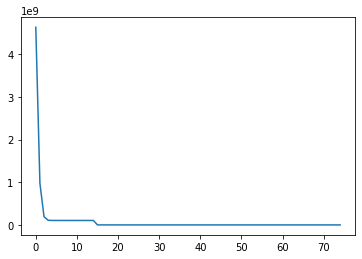

In [0]:
# Hyperparameters that work: prior_s 0.8
# Fix likelihood mean at 1?
bnn = BNNBayesbyBackprop(prior_mu=0, prior_s=0.8, num_MC_samples=30, linear_regression=True, preset=False)
bnn.fit(X_train, y_train, plot=True, n_epochs=75, learning_rate=1.2e-2, batch_size=100)

mean log prior  -10.85805419921875
mean log post est  -8.540171508789063
mean likelihood est  -9594581.76
grads  tensor([[-6.0611e-03,  6.5291e-02],
        [-2.3825e+06,  3.0476e-02]]) 

change in w1:  [0.00371428 0.04469395] 
cur w1:  [0.02579749 2.3311822 ] 
old w1:  [0.02208321 2.2864883 ]
change in w2:  [ 0.00758678 -0.00392391] 
cur w2:  [-0.00246335  0.00123193] 
old w2:  [-0.01005013  0.00515584]
change in b:  [-0.03452361 -0.00674349] 
cur b:  [-1.1796664 -0.0102181] 
old b:  [-1.1451428 -0.0034746]
full weights: 
 [[ 2.5797486e-02 -2.4633538e-03]
 [ 2.3311822e+00  1.2319307e-03]]
Epoch:  0 	Loss:  673576100.0 	MAE:  41.32723 

mean log prior  -24.61102294921875
mean log post est  -8.463220825195313
mean likelihood est  -5268770.56
grads  tensor([[ 3.0992e-02,  3.7014e-02],
        [-1.7520e+06,  6.3557e-03]]) 

change in w1:  [-0.00137663  0.03732729] 
cur w1:  [1.6393173e-03 4.4182367e+00] 
old w1:  [3.0159478e-03 4.3809094e+00]
change in w2:  [-0.00211902  0.00275369] 
cur 

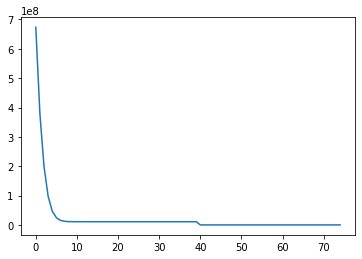

In [0]:
# Hyperparameters that work: prior_s 0.8
# Fix likelihood mean at 1?
bnn = BNNBayesbyBackprop(prior_mu=0, prior_s=0.8, linear_regression=True, preset=False)
bnn.fit(X_train, y_train, plot=True, n_epochs=75, learning_rate=5e-2, batch_size=100)

In [0]:
for _ in range(10):
    pred1 = X_train @ W + b 
    pred2 = X_train @ W + b + np.random.normal(loc=0, scale=np.exp(X_train @ W_s + b_s))
    mae1 = np.mean(np.abs(pred1 - y_train))
    mae2 = np.mean(np.abs(pred2 - y_train))
    print("MAE 1: ", mae1, "MAE 2:", mae2)

MAE 1:  3.0056122393554254 MAE 2: 4.229932547897288
MAE 1:  3.0056122393554254 MAE 2: 4.163598483397882
MAE 1:  3.0056122393554254 MAE 2: 4.064748158286918
MAE 1:  3.0056122393554254 MAE 2: 4.157970359536937
MAE 1:  3.0056122393554254 MAE 2: 4.18713532994711
MAE 1:  3.0056122393554254 MAE 2: 4.068806773370651
MAE 1:  3.0056122393554254 MAE 2: 4.10697160790373
MAE 1:  3.0056122393554254 MAE 2: 4.275199441081447
MAE 1:  3.0056122393554254 MAE 2: 4.105935688264671
MAE 1:  3.0056122393554254 MAE 2: 4.140327650161342


tensor([ 73.2484, -10.4592,  80.1985,  36.0612,  85.2357],
       grad_fn=<SelectBackward>)
tensor([52.9553,  7.0205, 62.6282,  ...,  5.3123,  3.1554, 38.7316],
       grad_fn=<ExpBackward>)
[[ 0.          7.83732011]
 [ 0.         -0.55350876]
 [ 0.          8.53399163]
 ...
 [ 0.         -1.71126102]
 [ 0.         -3.87444431]
 [ 0.          6.53840831]]


Text(0, 0.5, 'output[:,1] (Standard Deviation)')

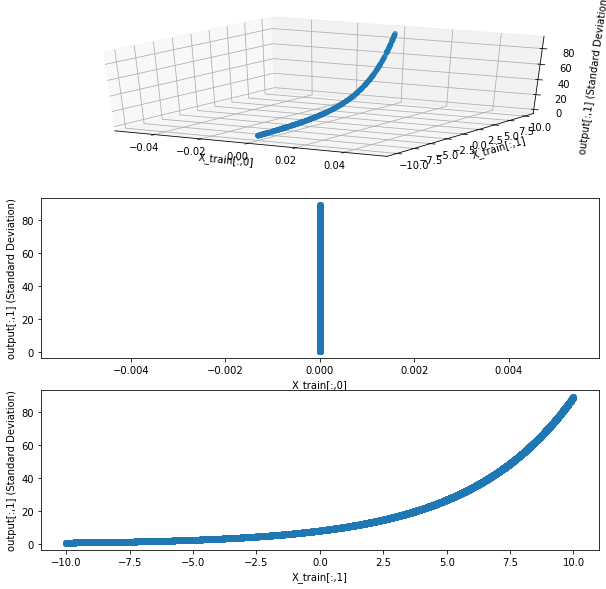

In [0]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

final_pred = bnn.model.forward(torch.Tensor(X_train))
print(final_pred[:5,0])


pred_std = torch.exp(final_pred[:,1])

print(pred_std)
print(X_train)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(311, projection='3d')

sparse_cap = int(len(X_train) / 10)

ax.scatter(X_train[:sparse_cap,0], X_train[:sparse_cap,1], pred_std[:sparse_cap].detach().numpy())
ax.set_xlabel('X_train[:,0]')
ax.set_ylabel('X_train[:,1]')
ax.set_zlabel('output[:,1] (Standard Deviation)')



# 2D Plot:
ax_2d_x = fig.add_subplot(312)
ax_2d_x.scatter(X_train[:,0], pred_std.detach().numpy())
ax_2d_x.set_xlabel('X_train[:,0]')
ax_2d_x.set_ylabel('output[:,1] (Standard Deviation)')


ax_2d_y = fig.add_subplot(313)
ax_2d_y.scatter(X_train[:,1], pred_std.detach().numpy())
ax_2d_y.set_xlabel('X_train[:,1]')
ax_2d_y.set_ylabel('output[:,1] (Standard Deviation)')



[ 0.7019849  0.8952522  1.1417292  1.4560653  1.8569429  2.3681886
  3.020188   3.8516934  4.9121256  6.2645106  7.9892287 10.18879
 12.993922  16.571356  21.13371   26.95215   34.372505  43.8358
 55.904476  71.295845  90.9247   ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


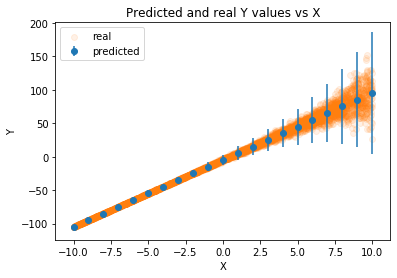

[array([0.05502322]), array([0.07427358]), array([0.10025884]), array([0.13533528]), array([0.18268352]), array([0.24659696]), array([0.33287108]), array([0.44932896]), array([0.60653066]), array([0.81873075]), array([1.10517092]), array([1.4918247]), array([2.01375271]), array([2.71828183]), array([3.66929667]), array([4.95303242]), array([6.68589444]), array([9.0250135]), array([12.18249396]), array([16.44464677]), array([22.19795128])]


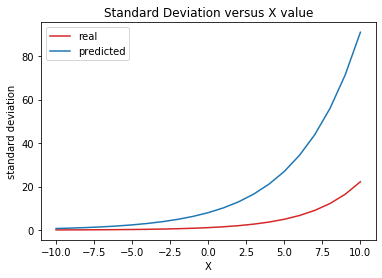

In [0]:
np.zeros(40)
X_sample = np.vstack([np.zeros(21), np.array(list(range(-10,11)))]).T
X_sample = torch.tensor(np.array(X_sample), dtype=torch.float32)


predictions = bnn.model.forward(torch.Tensor(X_train))

sample_pred = bnn.model.forward(X_sample)

y_pred = sample_pred[:,0].detach().numpy()
std_pred = torch.exp(sample_pred[:,1]).detach().numpy()
log_s_pred = sample_pred[:,1].detach().numpy()

print(std_pred)

# Sample variance to add to the y predictions
std_array = []
for scale in std_pred:
  std_array.append(np.random.normal(loc=0, scale=np.exp(scale)))
std_array = np.array((std_array))



"""
plt.scatter(X_train[:,0], y_pred + std_array, alpha=.1, label='predicted')
plt.scatter(X_train[:,0], y_train, alpha=.1, label='real')
plt.title("Y hat and Y values across X1")
plt.legend()
plt.savefig("x1_y.png")
"""


plt.show()

# For constant std dev#
#std_pred = 10 * torch.ones([y_pred.shape[0]], dtype=torch.float64)
# For constant std dev#

#plt.scatter(X_train[:,1], y_pred + std_array, alpha=.1, label='predicted')
#plt.scatter(X_sample[:,1], y_pred, alpha=.1, label='predicted')
plt.errorbar(X_sample[:,1], y_pred, yerr=(std_pred), fmt='o', label='predicted')
plt.scatter(X_train[:,1], y_train, alpha=.1, c='C1', label='real')
plt.ylabel("Y")
plt.xlabel("X")
# plt.xlim(right = 5)
# plt.xlim(left = -5)
# plt.ylim(top = 100)
# plt.ylim(bottom = -100)
plt.title("Predicted and real Y values vs X")
plt.legend()
plt.savefig("x_y1.png")
plt.show()



#stds = []
#Xs = list(range(-10, 11))
#for x in Xs:
#    stds.append(x + b_s)

#std_pred = predictions[:,1].detach().numpy()

real_std = []
for x in range(-10, 11):
    real_std.append(np.exp(np.array([0, x] @ W_s + b_s)))
print(real_std)
# plt.plot(list(range(-10,11)), list(range(0, 21)), c='C3', label='real')
plt.plot(list(range(-10,11)), real_std, c='C3', label='real')
plt.plot(X_sample[:,1], (std_pred), label='predicted')
plt.title("Standard Deviation versus X value")
plt.ylabel("standard deviation")
plt.xlabel("X")
plt.legend()
plt.savefig("std1.png")
# plt.xlim(right = 5)
# plt.xlim(left = -5)
# plt.ylim(top = 100)
# plt.ylim(bottom = -100)
plt.show()

In [0]:
print(torch.exp(bnn.model.l1.W_log_s_DO))

tensor([[0.1449, 0.1307, 0.1374, 0.1398, 0.1270],
        [0.5950, 0.5896, 0.5357, 0.6016, 0.5273]], grad_fn=<ExpBackward>)


In [0]:

plt.plot([i for i in range(100)], loss_by_epoch)

NameError: ignored